# Comparing loss of life years in two different COVID-19 public policies in Israel:
## Extreme lockdown
## No social distancing (runaway scenario)
* In case of no social distancing or other steps to limit the corona, many people will die
* In case of extreme quarantine, we will lose resources (shrinking economy), leading to less available resources (private and public) for the health system. This will also result in loss of life.
* Main data sources:
    - Models of the health bureau for no social distancing epidemic: https://www.themarker.com/news/health/1.8680993
    - Estimates for damgage to the Israeli GDP by finance bureau, in case of extreme quarantine: for instance https://www.themarker.com/markets/1.8705742
    - Demographics in Israel (Central bureau of statistics):
        * https://www.cbs.gov.il/he/publications/Pages/2019/%D7%91%D7%A8%D7%99%D7%90%D7%95%D7%AA-%D7%A9%D7%A0%D7%AA%D7%95%D7%9F-%D7%A1%D7%98%D7%98%D7%99%D7%A1%D7%98%D7%99-%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C-2019-%D7%9E%D7%A1%D7%A4%D7%A8-70.aspx
        * https://www.cbs.gov.il/he/publications/Pages/2018/%D7%91%D7%A8%D7%99%D7%90%D7%95%D7%AA-%D7%A9%D7%A0%D7%AA%D7%95%D7%9F-%D7%A1%D7%98%D7%98%D7%99%D7%A1%D7%98%D7%99-%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C-2018-%D7%9E%D7%A1%D7%A4%D7%A8-69.aspx
    - Health spending (same as the above)
    - Residual life exectnacy: how many year is a person in a given age expected to live more. For instance: A newborn today has a residual life expectancy of ~80 years. A 100 years old person has a life expectancy of ~1 year (same as the above)
* 2 main sub analyses and their assumptions (in separated notebooks):
    - In case of no social distancing: quantification of lost life years (people that die becuase of COVID-19 live less then their residual life expectancy)
        * Assumption: dying from COVID-19 is statistically independent to dying anyway this year. This gives an upper bound of net additional life years lost by COVID-19, since people with underlying risk factors are more likely to die naturally or due to COVID-19. This bound may be improved in further analysis.
    - The effect of health spending on residual life expectancy, which enables estimating loss of life years related to health-spending-cutss.
        * Assumption: the improvement of residual life expectancy is 50% due to additional resources, and 50% due to technological improvement. This seems like a rough but fair assumption in an era excluding huge wars or revolutions such as sewage systems
        * Assumption: the resources loss on health spending is proportional to the loss of resources for everything. That is, that the priorities are the same. This is justified since we can give more resources to health in any public policy, either in extreme quarantine or in no social distancing.
* What this analysis doesn't cover:
    - Epidemics model. I currently use the predictions of the health bureau
    - Model for predicting the effect of quarantine on the GDP. I use predictions of finance bureau
    - Public policies other then these two (currently)
    - Effects of loss of resources on life loss other then through health spending, such as degenerated infrastructure, unemployment, quarantined elderly not exposed to enough sunlight etc
* Some nit-picking:
    - In some cases I use data of a close year (2017 instead of 2019 for instance) since I couldn't find the original data, or mixing NIS of 2015 with NIS of 2019 without adjusting. However, I think that I have done so in a reasonable for a 0-th order estimae

In [1]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution, closed_ranges_to_interval_index
import parameters

path_data = Path("../data")
path_results = Path("../analysis_results")

pprint(list(path_results.iterdir()))

[PosixPath('../analysis_results/Health-spending cuts related mortality vs COVID-19 related mortality, age > 50 (scenario 2B).jpeg'),
 PosixPath('../analysis_results/scenario_1B'),
 PosixPath('../analysis_results/health_spending_per_capita_yearly_increase.yaml'),
 PosixPath('../analysis_results/df_death.csv'),
 PosixPath('../analysis_results/residual_life_expectancy_yearly_increace_by_age.csv'),
 PosixPath('../analysis_results/Health-spending cuts related mortality vs COVID-19 related mortality (scenario 2B).jpeg'),
 PosixPath('../analysis_results/total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'),
 PosixPath('../analysis_results/total_remaining_life_years_yearly_increace_by_age.csv'),
 PosixPath('../analysis_results/united_kingdom')]


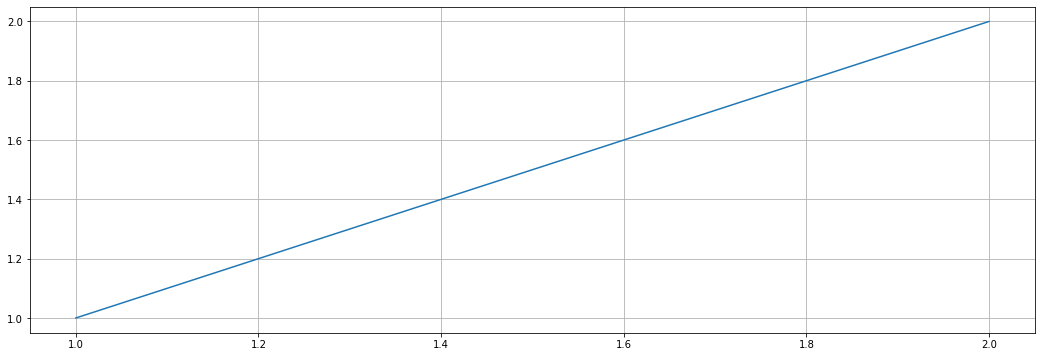

In [2]:
fig, ax = plt.subplots()
ax.plot([1, 2], [1, 2])
matplotlib.rcParams['figure.figsize'] = [18, 6]


## load results made in other notebooks

In [3]:
df_death =  pd.read_csv(path_results.joinpath('df_death.csv'), index_col=0)
df_death.index = closed_ranges_to_interval_index(df_death.index)
df_death.index.name = 'age_group'

yearly_increase_by_age = pd.read_csv(path_results.joinpath('yearly_increase_by_age_group.csv'), index_col=0, usecols=['age_group', 'total_remaining_life_years_2016', 'total_remaining_life_years_life_equivalent_2016'])
yearly_increase_by_age.index = closed_ranges_to_interval_index(yearly_increase_by_age.index)
yearly_increase_by_age = reduce_histogram_resolution(yearly_increase_by_age, df_death.index)

In [4]:
df_death

fraction_of_total_corona_mortality  COVID_19_mortality  \
age_group                                                           
[0, 9]                                  0.000                 0.0   
[10, 19]                                0.001                10.0   
[20, 29]                                0.007                70.0   
[30, 39]                                0.015               150.0   
[40, 49]                                0.028               280.0   
[50, 59]                                0.079               790.0   
[60, 69]                                0.241              2410.0   
[70, 79]                                0.303              3030.0   
[80, 120]                               0.326              3260.0   

           normal_mortality  population  net_COVID_19_mortality  \
age_group                                                         
[0, 9]                219.0   1654530.0                0.000000   
[10, 19]              246.0   1377821.0                9.998215   
[20, 29]              420.0   1178880.0               69.975061   
[30, 39]              604.0   1117905.0              149.918956   
[40, 49]             1211.0   1019070.0              279.667265   
[50, 59]             2643.0    779142.0              787.320168   
[60, 69]             5892.0    702437.0             2389.785063   
[70, 79]             8896.0    430872.0             2967.441096   
[80, 120]           24220.0    258715.0             2954.810119   

           residual_life_expectancy  COVID_19_lost_life_years  \
age_group                                                       
[0, 9]                       79.500                  0.000000   
[10, 19]                     70.075                700.624886   
[20, 29]                     60.225               4214.248053   
[30, 39]                     50.450               7563.411307   
[40, 49]                     40.725              11389.449377   
[50, 59]                     31.350              24682.487253   
[60, 69]                     22.500              53770.163908   
[70, 79]                     14.425              42805.337813   
[80, 120]                     8.150              24081.702472   

           normally_lost_life_years  COVID_19_to_normally_lost_life_years  
age_group                                                                  
[0, 9]                    17410.500                              0.000000  
[10, 19]                  17238.450                              0.040643  
[20, 29]                  25294.500                              0.166607  
[30, 39]                  30471.800                              0.248210  
[40, 49]                  49317.975                              0.230939  
[50, 59]                  82858.050                              0.297889  
[60, 69]                 132570.000                              0.405598  
[70, 79]                 128324.800                              0.333570  
[80, 120]                197393.000                              0.121999

In [5]:
total_remaining_life_years_yearly_increace_by_age = pd.read_csv(path_results.joinpath('total_remaining_life_years_yearly_increace_by_age.csv'), index_col=0, squeeze=True)
total_remaining_life_years_yearly_increace_by_age.index = closed_ranges_to_interval_index(total_remaining_life_years_yearly_increace_by_age.index)
total_remaining_life_years_yearly_increace_by_age = reduce_histogram_resolution(total_remaining_life_years_yearly_increace_by_age, df_death.index)
total_remaining_life_years_yearly_increace_by_age.name = 'total_remaining_life_years_yearly_increace_by_age'

In [6]:
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = pd.read_csv(path_results.joinpath('total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'), index_col=0, squeeze=True)
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.index = closed_ranges_to_interval_index(total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.index)
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = reduce_histogram_resolution(total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age, df_death.index)
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.name = 'health-spending-reduction life equivalent'

In [7]:
with open(path_results.joinpath('health_spending_per_capita_yearly_increase.yaml'), 'r') as file:
    #yearly_increase_health_spending_per_capita_nis = 
    yearly_increase_health_spending_per_capita_nis = yaml.load(file, yaml.FullLoader)['health_spending_per_capita_yearly_increase']
    print(yearly_increase_health_spending_per_capita_nis)

171.88155384610036


In [8]:
est_ministry_of_finance_damage_billions_of_nis = parameters.est_ministry_of_finance_damage_billions_of_nis[parameters.MOF_scenario]

In [9]:
print(f'MOH: {parameters.MOH_scenario}, MOF: {parameters.MOF_scenario}')

MOH: 2B, MOF: 4


In [10]:
df_health_expenditure = pd.read_csv(path_data.joinpath('israel_health_spending_inflation_adjusted.csv'), index_col=0)
population = pd.read_csv(path_data.joinpath('israel_demographic_table_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)


### health spending per capita cuts due to extreme lockdown

In [11]:

israel_2016_health_expenditure = df_health_expenditure.total_health_spending_millions_nis_inflation_adjusted_2015.loc[2016]
health_spending_loss_nis_per_capita =  est_ministry_of_finance_damage_billions_of_nis / parameters.est_israel_gdp_2019_billions_of_nis * israel_2016_health_expenditure / (population.loc[2016] / 1000)
#loss_nis_per_capita = 
health_spending_loss_nis_per_capita

1868.459831776939

In [12]:
years_rollback = health_spending_loss_nis_per_capita / yearly_increase_health_spending_per_capita_nis
years_rollback

10.87062450837467

## conclusion: 

approx (not current health spending not current population but 2016, should fine tune nis 2020 nis 2015, easily mended):

In [13]:
print(f"loss of {health_spending_loss_nis_per_capita} nis per capita of health spending. eauivalent of having health spending like {years_rollback} years back")

loss of 1868.459831776939 nis per capita of health spending. eauivalent of having health spending like 10.87062450837467 years back


# prepare params string

In [14]:
params_string = f'GDP loss: {parameters.est_ministry_of_finance_damage_billions_of_nis[parameters.MOF_scenario]} [Billions NIS]\nHealth spending per capita cuts: {health_spending_loss_nis_per_capita:.0f} [NIS]  \nCOVID_19 mortality: {parameters.corona_mortality_tot[parameters.MOH_scenario]}'
print(params_string)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

GDP loss: 250 [Billions NIS]
Health spending per capita cuts: 1868 [NIS]  
COVID_19 mortality: 10000


## comparison

### mortality, or mortaliy equivalent (statistical mortality

In [15]:
loss_of_life_years_related_to_health_spending_cuts = total_remaining_life_years_yearly_increace_by_age * parameters.health_spending_weight_in_residual_life_expectancy * years_rollback
loss_of_life_years_related_to_health_spending_cuts.name = 'health-spending-reduction related lost life years'

In [16]:
title_temp = f'Mortality equivalent, MOH scenario: {parameters.MOH_scenario}'

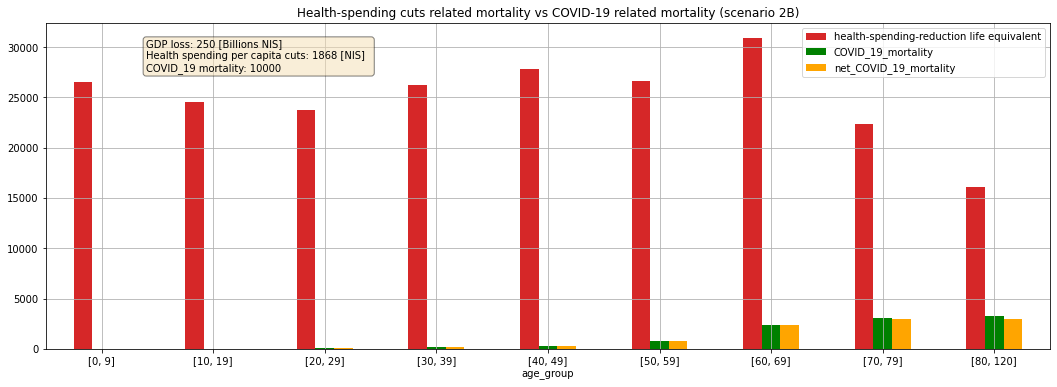

In [17]:
cmp_mortality = pd.concat([parameters.health_spending_weight_in_residual_life_expectancy * years_rollback * total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age, df_death.loc[:, ['COVID_19_mortality', 'net_COVID_19_mortality', ]]], axis=1)
ax = cmp_mortality.plot.bar(rot=0, color=['C3', 'green', 'orange'])
title = f'Health-spending cuts related mortality vs COVID-19 related mortality (scenario {parameters.scenario_number})'
ax.set_title(title)
ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

fig = ax.get_figure()
fig.savefig(path_results.joinpath(title + '.jpeg'))

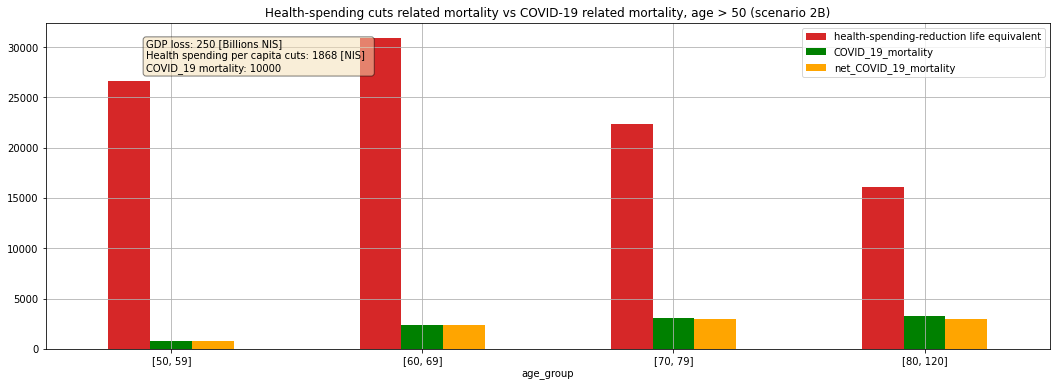

In [18]:
ax = cmp_mortality.iloc[-4:, :].plot.bar(title='above age 50 only', rot=0, color=['C3', 'green', 'orange'])
title = f'Health-spending cuts related mortality vs COVID-19 related mortality, age > 50 (scenario {parameters.scenario_number})'
ax.set_title(title)
ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)


fig = ax.get_figure()
fig.savefig(path_results.joinpath(title + '.jpeg'))

### loss of life years

In [19]:
cmp = pd.concat([loss_of_life_years_related_to_health_spending_cuts, df_death.COVID_19_lost_life_years], axis=1)

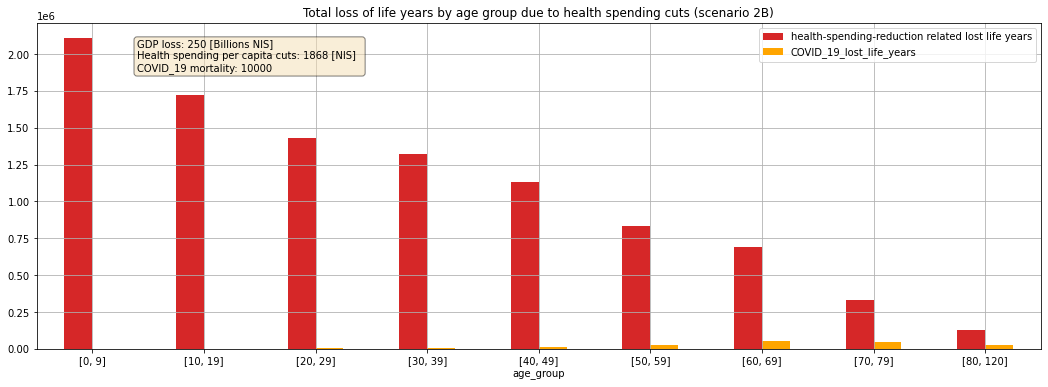

In [20]:
ax = cmp.plot.bar(rot=0, color=['C3', 'orange'])
title = f'Total loss of life years by age group due to health spending cuts (scenario {parameters.scenario_number})'
ax.set_title(title)
ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

fig = ax.get_figure()
fig.savefig(path_results.joinpath(title + '.jpeg'))

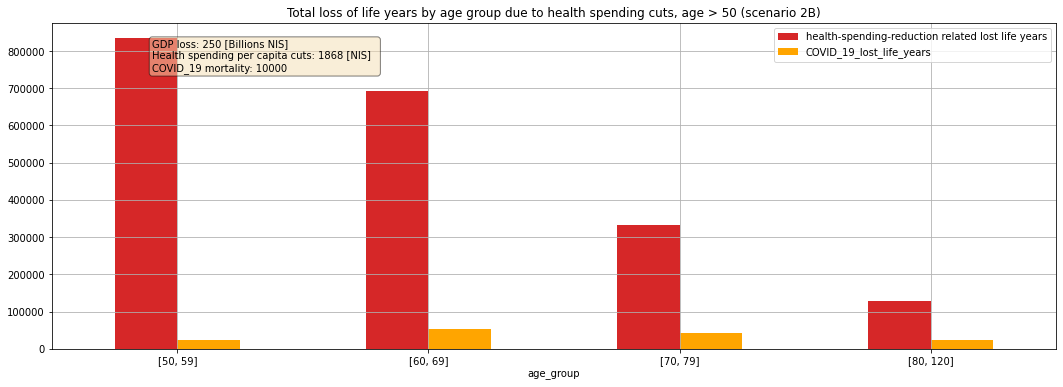

In [21]:
ax = cmp.iloc[-4:, :].plot.bar(title='above age 50 only', rot=0, color=['C3', 'orange'])
title = f'Total loss of life years by age group due to health spending cuts, age > 50 (scenario {parameters.scenario_number})'
ax.set_title(title)
ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

fig = ax.get_figure()
fig.savefig(path_results.joinpath(title + '.jpeg'))